Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../../data/fjthrput/1/'

N = 100_000
A = 500
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}3/throughput_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}3/throughput_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}3/throughput_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}3/throughput_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Apr 6 12:37:24 2025 +0200) (509.67ms elap...,0.2170,0.00000,0.365,0.65,0.03,2.63,66.24 C,Nominal
1,(Sun Apr 6 12:37:24 2025 +0200) (508.53ms elap...,0.0937,0.03900,0.374,0.37,0.04,3.25,66.90 C,Nominal
2,(Sun Apr 6 12:37:25 2025 +0200) (508.32ms elap...,0.3330,0.00012,0.294,0.56,0.17,10.03,66.90 C,Nominal
3,(Sun Apr 6 12:37:25 2025 +0200) (508.82ms elap...,0.2130,0.00000,0.279,0.55,0.12,6.18,66.56 C,Nominal
4,(Sun Apr 6 12:37:26 2025 +0200) (508.15ms elap...,0.0739,0.00000,0.269,0.21,0.03,2.50,66.56 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(383, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Apr 6 12:37:35 2025 +0200) (108.49ms elap...,36.3,0.0,1.110,37.16,3.98,99.58,63.73 C,Nominal
1,(Sun Apr 6 12:37:35 2025 +0200) (105.31ms elap...,36.3,0.0,1.220,37.69,3.98,99.69,63.73 C,Nominal
2,(Sun Apr 6 12:37:35 2025 +0200) (104.75ms elap...,29.2,0.0,0.590,29.77,3.99,99.73,63.73 C,Nominal
3,(Sun Apr 6 12:37:35 2025 +0200) (104.56ms elap...,28.6,0.0,0.780,29.55,3.92,98.79,63.88 C,Nominal
4,(Sun Apr 6 12:37:35 2025 +0200) (104.42ms elap...,27.9,0.0,0.442,28.51,3.97,99.46,63.88 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Apr 6 12:39:54 2025 +0200) (511.23ms elap...,0.1120,0.0000,0.240,0.29,0.06,4.15,58.48 C,Nominal
1,(Sun Apr 6 12:39:54 2025 +0200) (508.03ms elap...,0.9870,0.0328,0.393,1.34,0.17,14.32,58.43 C,Nominal
2,(Sun Apr 6 12:39:55 2025 +0200) (506.34ms elap...,0.2970,0.0000,0.264,0.47,0.08,5.44,58.43 C,Nominal
3,(Sun Apr 6 12:39:55 2025 +0200) (509.11ms elap...,0.0803,0.0000,0.275,0.32,0.03,2.65,58.34 C,Nominal
4,(Sun Apr 6 12:39:56 2025 +0200) (507.14ms elap...,0.0830,0.0000,0.228,0.29,0.05,3.75,58.34 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(5674, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Apr 6 12:40:05 2025 +0200) (106.37ms elap...,27.7,0.0,0.276,28.51,3.64,94.97,56.86 C,Nominal
1,(Sun Apr 6 12:40:05 2025 +0200) (104.00ms elap...,27.5,0.0,0.270,27.87,3.67,95.81,56.86 C,Nominal
2,(Sun Apr 6 12:40:05 2025 +0200) (103.97ms elap...,27.0,0.0,0.267,27.54,3.61,95.59,56.86 C,Nominal
3,(Sun Apr 6 12:40:05 2025 +0200) (104.33ms elap...,27.9,0.0,0.274,28.75,3.70,95.72,56.86 C,Nominal
4,(Sun Apr 6 12:40:05 2025 +0200) (103.97ms elap...,28.0,0.0,0.267,28.46,3.69,95.29,56.86 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-06 12:37:24,0.2170,0.00000,0.365,0.65,0.03,2.63,66.24,Nominal,509.67
1,2025-04-06 12:37:24,0.0937,0.03900,0.374,0.37,0.04,3.25,66.90,Nominal,508.53
2,2025-04-06 12:37:25,0.3330,0.00012,0.294,0.56,0.17,10.03,66.90,Nominal,508.32
3,2025-04-06 12:37:25,0.2130,0.00000,0.279,0.55,0.12,6.18,66.56,Nominal,508.82
4,2025-04-06 12:37:26,0.0739,0.00000,0.269,0.21,0.03,2.50,66.56,Nominal,508.15


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(383, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-06 12:37:35,36.3,0.0,1.110,37.16,3.98,99.58,63.73,Nominal,108.49
1,2025-04-06 12:37:35,36.3,0.0,1.220,37.69,3.98,99.69,63.73,Nominal,105.31
2,2025-04-06 12:37:35,29.2,0.0,0.590,29.77,3.99,99.73,63.73,Nominal,104.75
3,2025-04-06 12:37:35,28.6,0.0,0.780,29.55,3.92,98.79,63.88,Nominal,104.56
4,2025-04-06 12:37:35,27.9,0.0,0.442,28.51,3.97,99.46,63.88,Nominal,104.42


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-06 12:39:54,0.1120,0.0000,0.240,0.29,0.06,4.15,58.48,Nominal,511.23
1,2025-04-06 12:39:54,0.9870,0.0328,0.393,1.34,0.17,14.32,58.43,Nominal,508.03
2,2025-04-06 12:39:55,0.2970,0.0000,0.264,0.47,0.08,5.44,58.43,Nominal,506.34
3,2025-04-06 12:39:55,0.0803,0.0000,0.275,0.32,0.03,2.65,58.34,Nominal,509.11
4,2025-04-06 12:39:56,0.0830,0.0000,0.228,0.29,0.05,3.75,58.34,Nominal,507.14


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(5674, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-06 12:40:05,27.7,0.0,0.276,28.51,3.64,94.97,56.86,Nominal,106.37
1,2025-04-06 12:40:05,27.5,0.0,0.270,27.87,3.67,95.81,56.86,Nominal,104.00
2,2025-04-06 12:40:05,27.0,0.0,0.267,27.54,3.61,95.59,56.86,Nominal,103.97
3,2025-04-06 12:40:05,27.9,0.0,0.274,28.75,3.70,95.72,56.86,Nominal,104.33
4,2025-04-06 12:40:05,28.0,0.0,0.267,28.46,3.69,95.29,56.86,Nominal,103.97


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


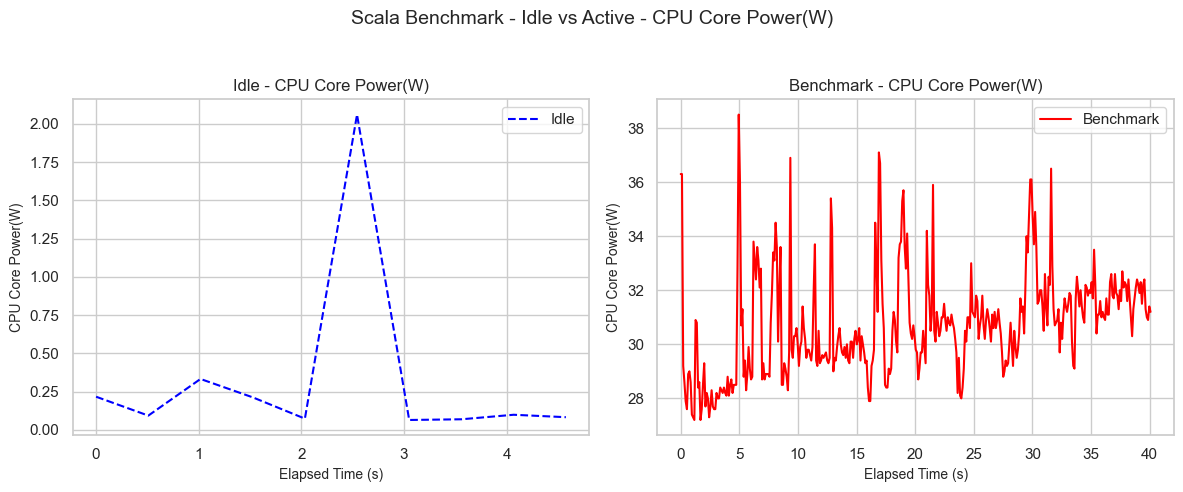

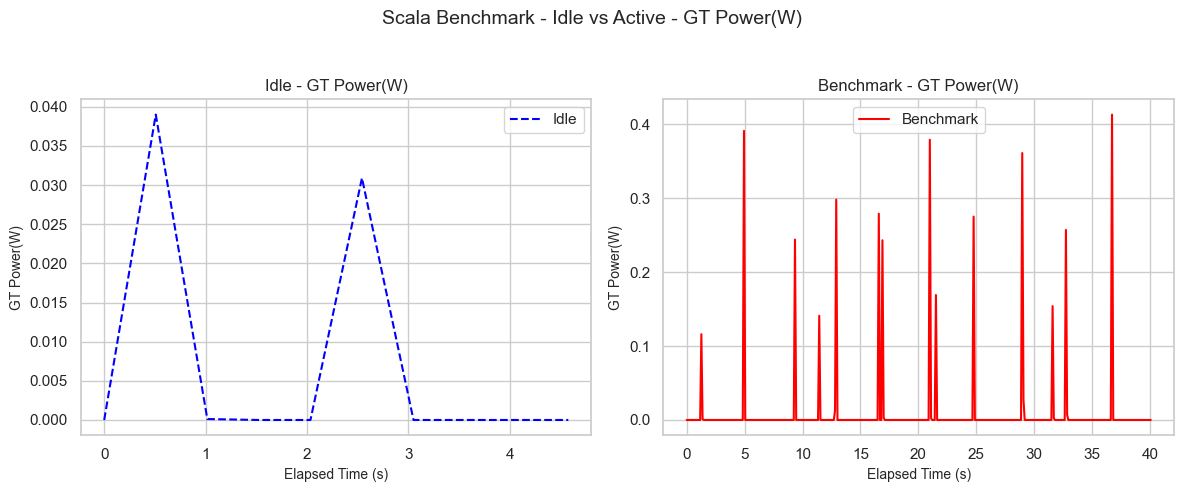

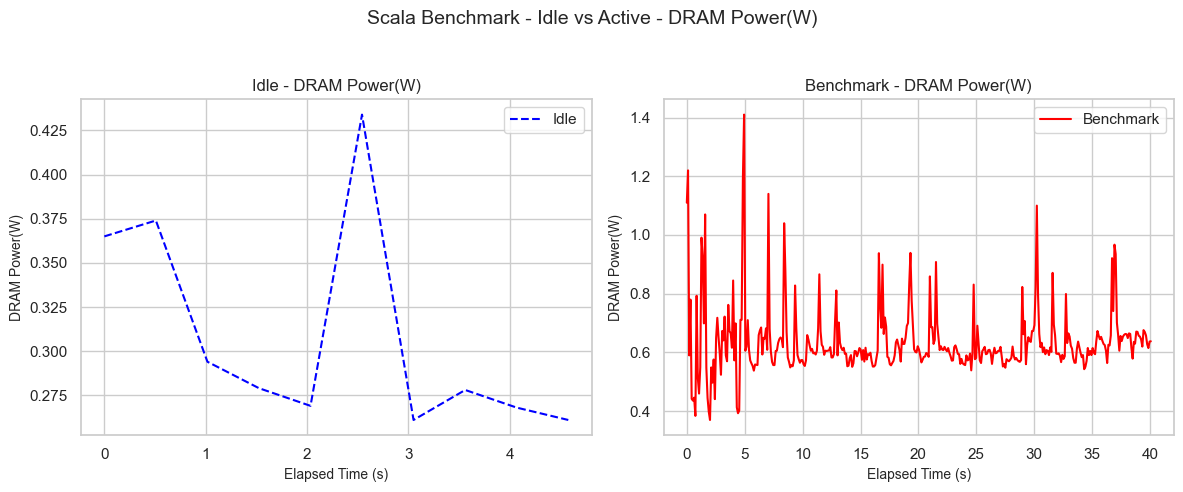

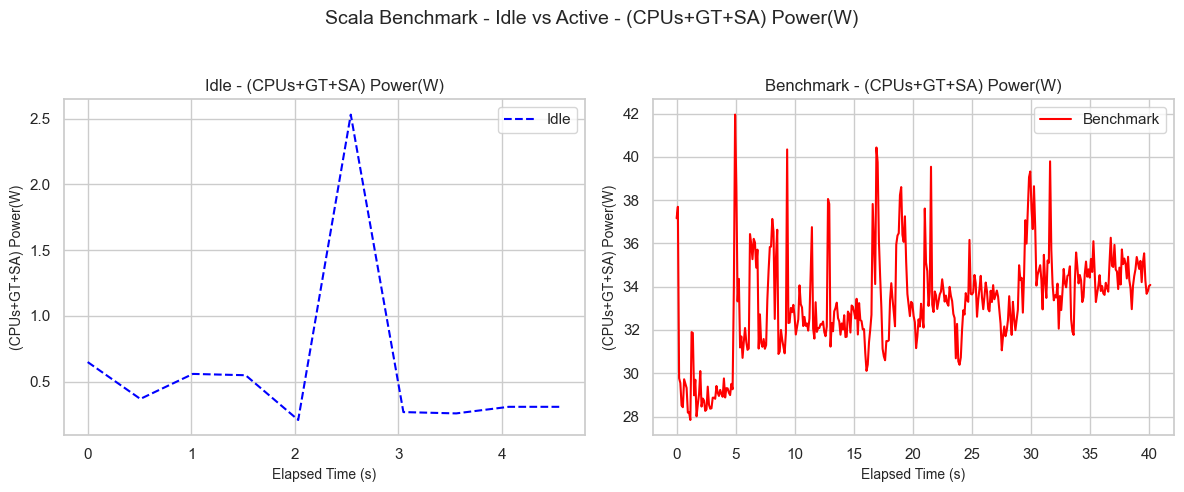

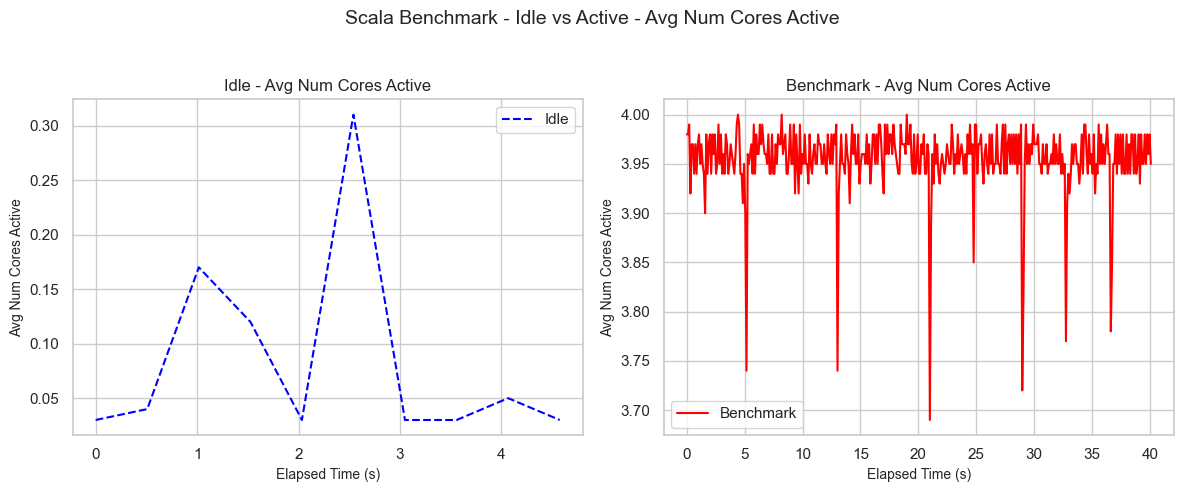

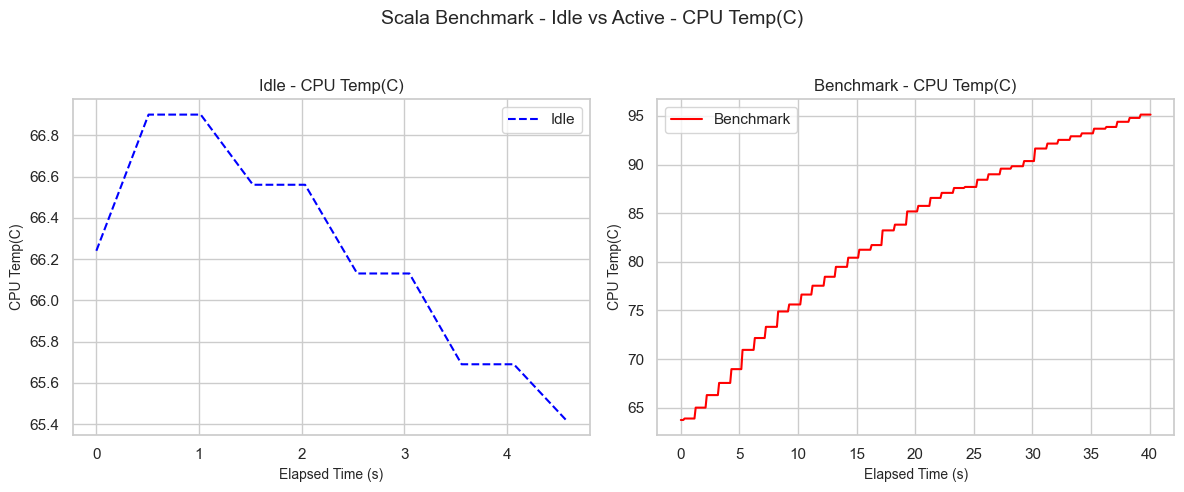

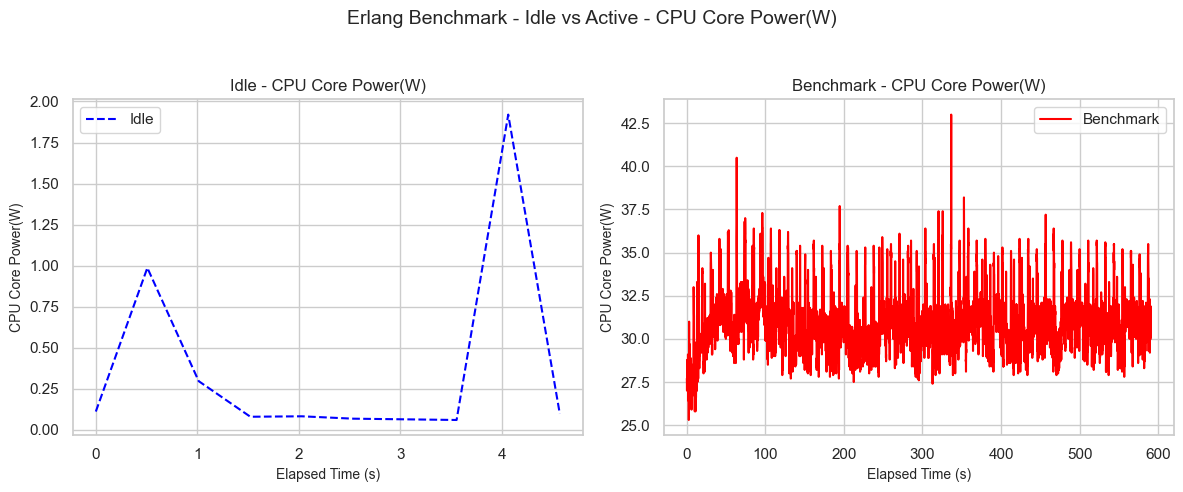

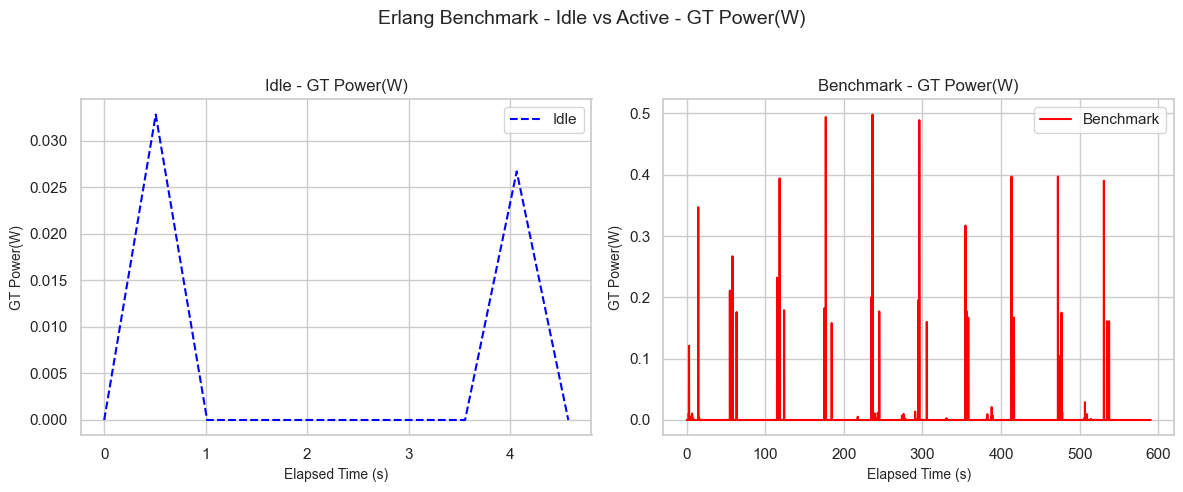

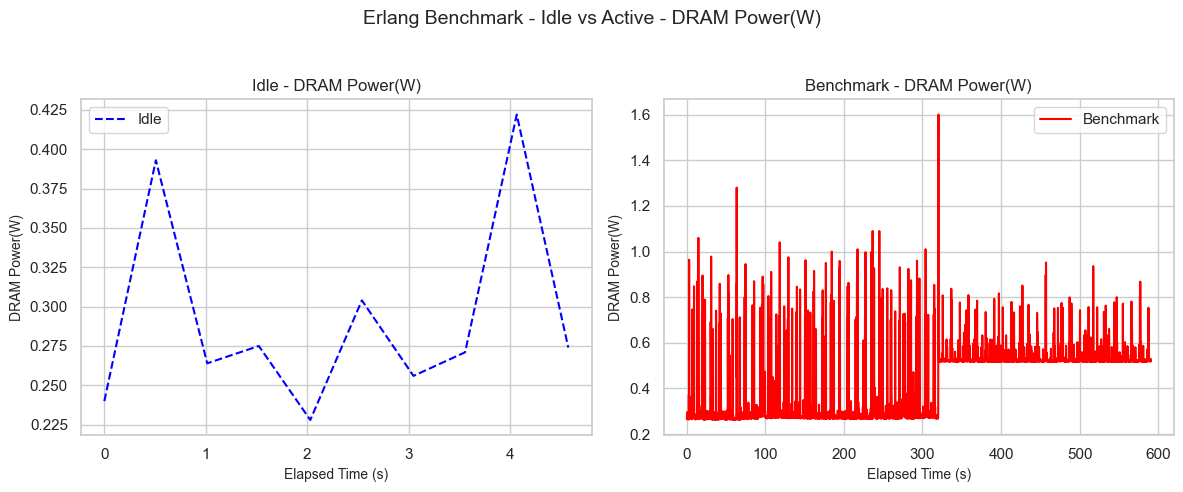

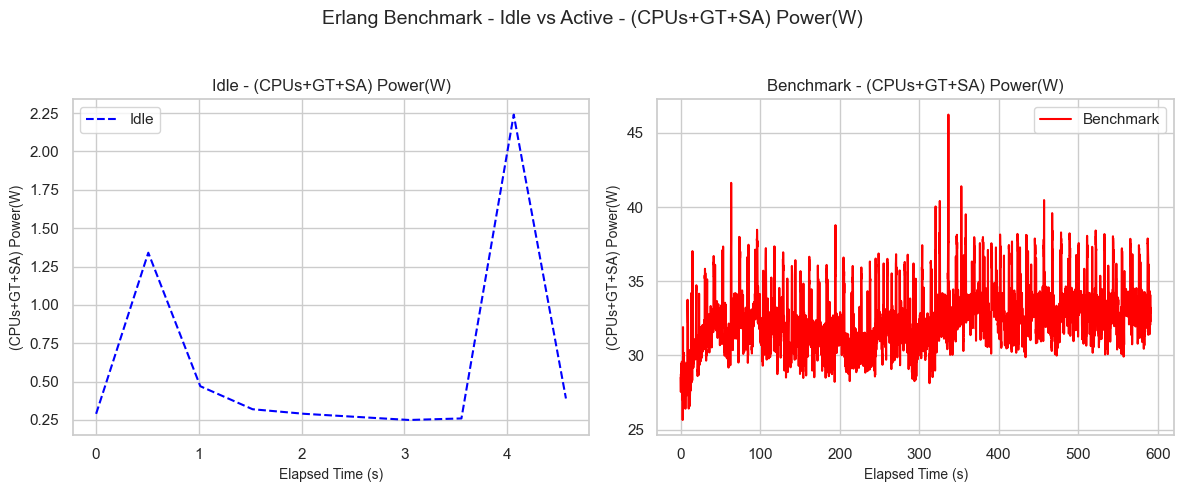

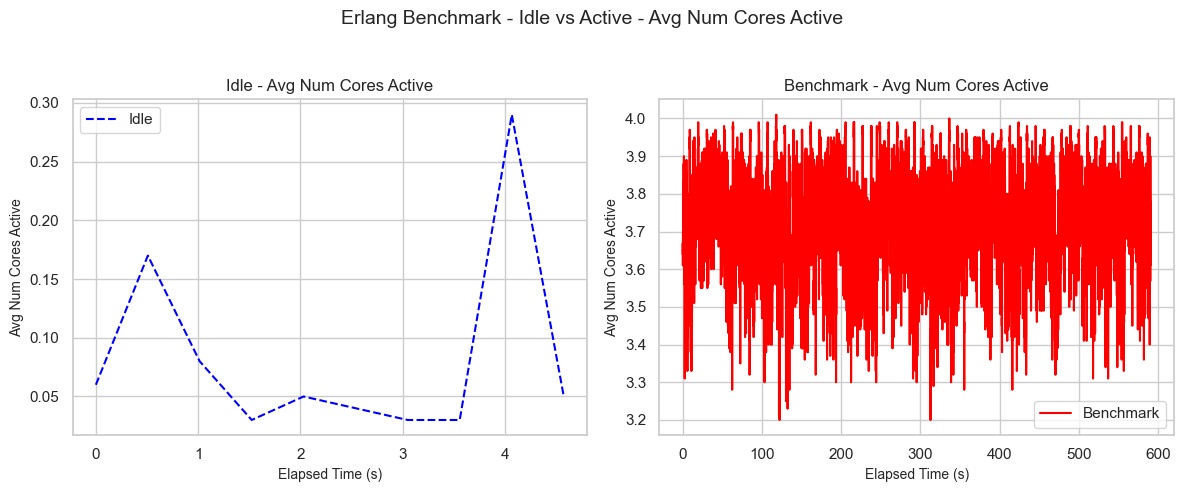

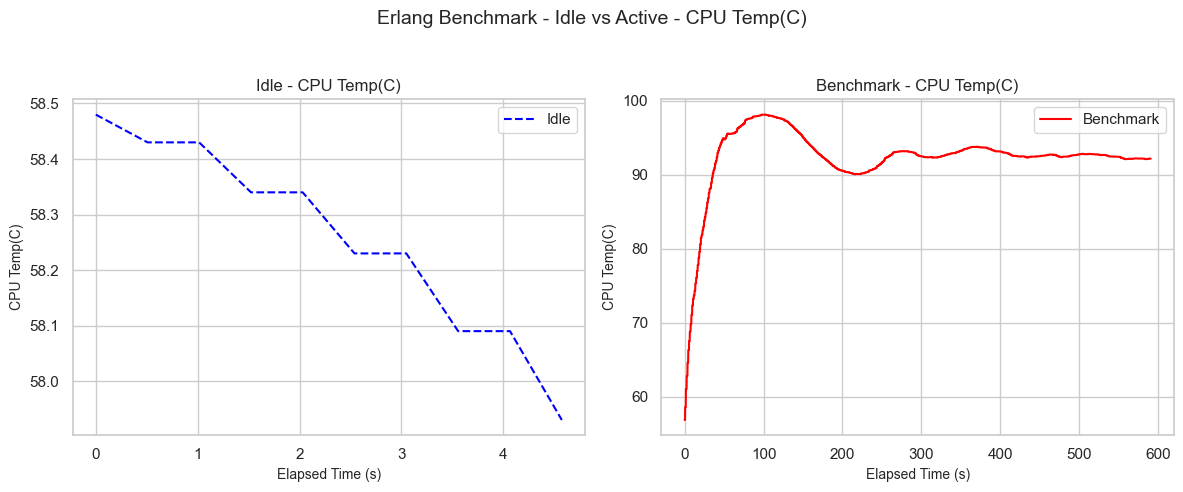

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(n):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if n >= 1_000_000_000:
        return f"{n // 1_000_000_000}B"
    elif n >= 1_000_000:
        return f"{n // 1_000_000}M"
    elif n >= 1_000:
        return f"{n // 1_000}K"
    return str(n)

n = format_number_str(N)
a = format_number_str(A)
title_config_prefix = f"({a} Actors, {n} Messages, {ITERATIONS} Iterations)"

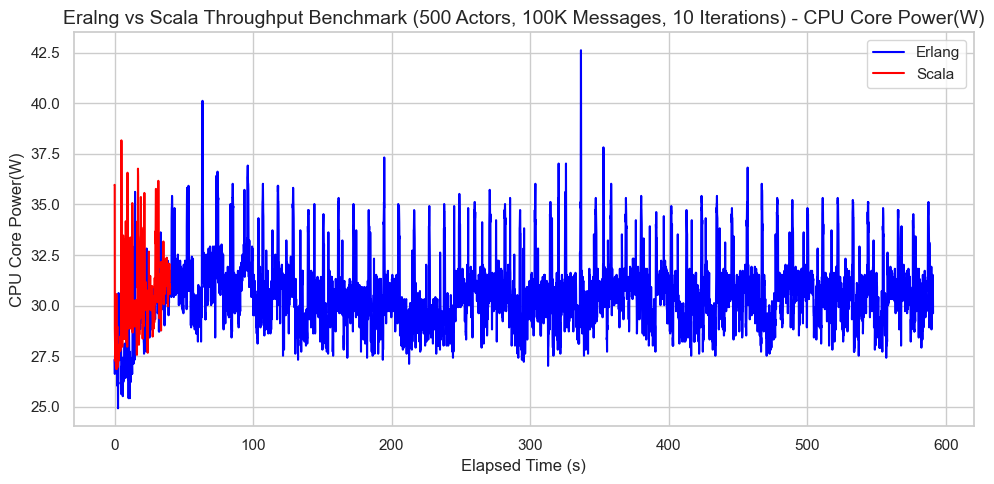

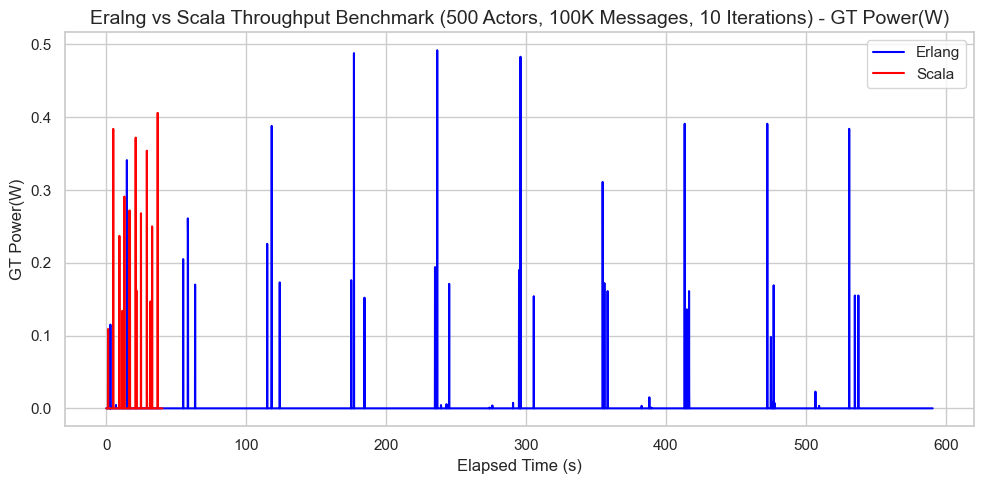

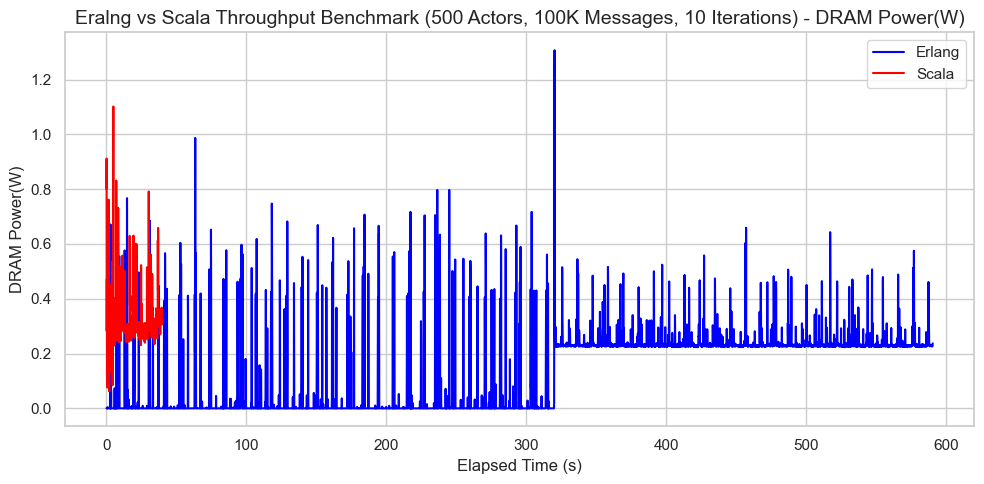

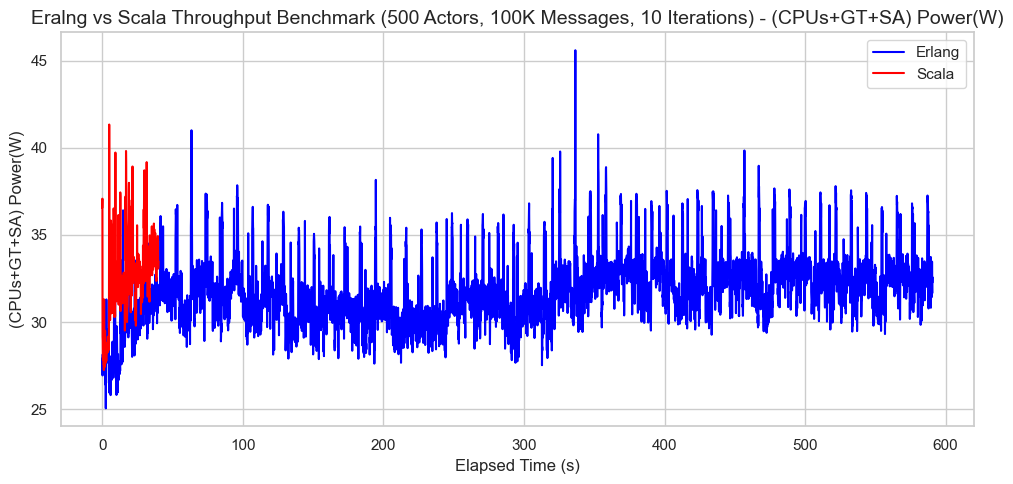

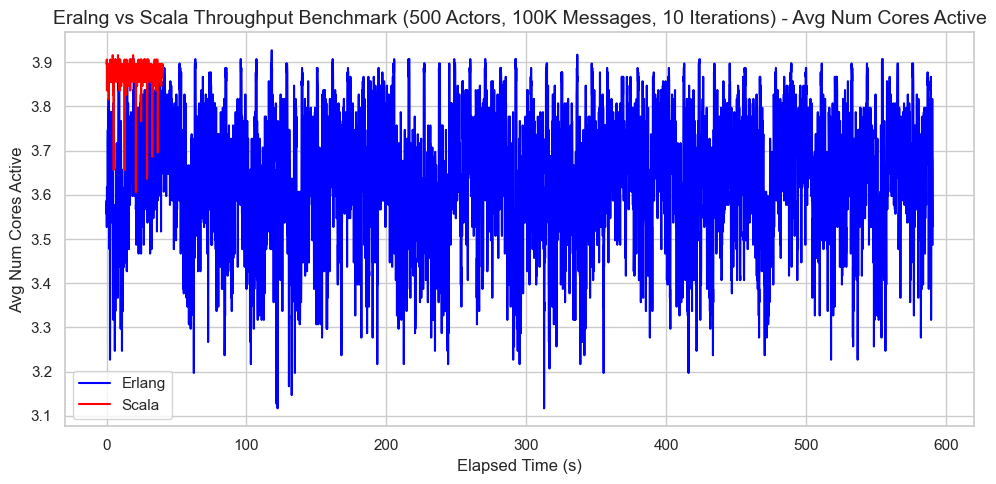

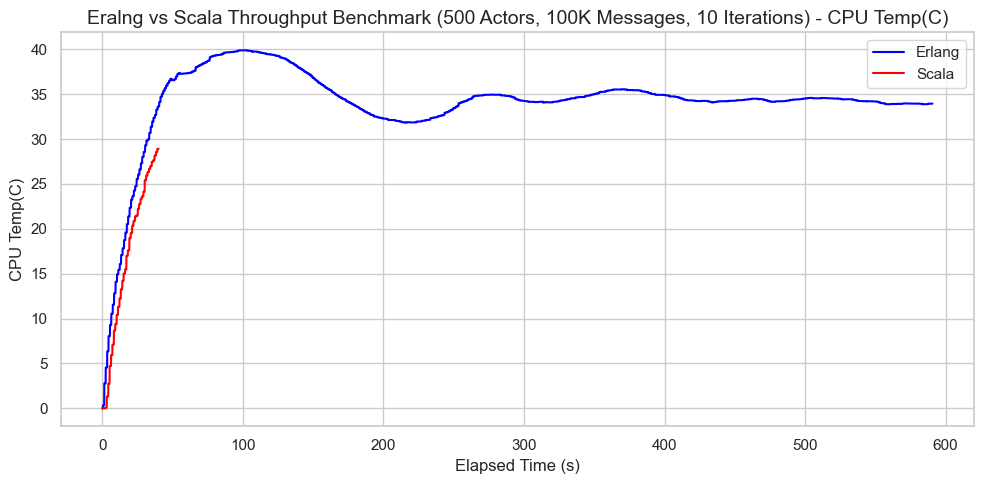

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Throughput Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        30.395320
GT Power(W)               0.002856
DRAM Power(W)             0.325979
(CPUs+GT+SA) Power(W)    32.613901
CPU Temp(C)              16.697765
Avg Num Cores Active      3.871457
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        30.590861
GT Power(W)              -0.004504
DRAM Power(W)             0.121372
(CPUs+GT+SA) Power(W)    31.796551
CPU Temp(C)              34.075818
Avg Num Cores Active      3.644845
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time
scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "A": A,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["A"] == A) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "A =", A, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/fjthrput/1/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 1234.3999207502418 Joules
Erlang Benchmark: 18142.29273471105 Joules
